In [241]:
#import python modules
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise<br>
Complain - 1 if customer complained in the last 2 years<br>
DtCustomer - date of customer’s enrolment with the company<br>
Education - customer’s level of education<br>
Marital - customer’s marital status<br>
Kidhome - number of small children in customer’s household<br>
Teenhome - number of teenagers in customer’s household<br>
Income - customer’s yearly household income<br>
MntFishProducts - amount spent on fish products in the last 2 years<br>
MntMeatProducts - amount spent on meat products in the last 2 years<br>
MntFruits - amount spent on fruits products in the last 2 years<br>
MntSweetProducts - amount spent on sweet products in the last 2 years<br>
MntWines - amount spent on wine products in the last 2 years<br>
MntGoldProds - amount spent on gold products in the last 2 years<br>
NumDealsPurchases - number of purchases made with discount<br>
NumCatalogPurchases - number of purchases made using catalogue<br>
NumStorePurchases - number of purchases made directly in stores<br>
NumWebPurchases - number of purchases made through company’s web site<br>
NumWebVisitsMonth - number of visits to company’s web site in the last month<br>
Recency - number of days since the last purchase<br>

In [3]:
! gdown --id 1GrYNYbVAQz44Cfz83YlegbbqgpdQMmoW

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GrYNYbVAQz44Cfz83YlegbbqgpdQMmoW
To: /content/marketing_campaign.xlsx
100% 316k/316k [00:00<00:00, 121MB/s]


In [242]:
df= pd.read_excel(r'C:\Users\62895\Downloads\marketing campaign\marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [243]:
df['umur'] = 2022-df['Year_Birth']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,55
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,76
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,41
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,66


In [244]:
kel=[]
for i in range(len(df)):
    if df['Year_Birth'][i]<1945:
        kel.append('pre-boomer')
    elif df['Year_Birth'][i]<=1946 or df['Year_Birth'][i]<=1964 :
        kel.append('baby boomers')
    elif df['Year_Birth'][i]<=1965 or df['Year_Birth'][i]<=1980 :
        kel.append('generasi X')
    elif df['Year_Birth'][i]<=1981 or df['Year_Birth'][i]<=1996 :
        kel.append('generasi Y')
    else:
        kel.append('generasi Z')
        
df['kelompok_usia']=kel
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur,kelompok_usia
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,baby boomers
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,baby boomers
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,generasi X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,generasi Y
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,generasi Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,55,generasi X
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,76,baby boomers
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,41,generasi Y
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,66,baby boomers


In [245]:
#Check Duplicate
print(df.shape)
df.duplicated().sum()

(2240, 31)


0

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [247]:
#missing Value
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
umur                    0
kelompok_usia           0
dtype: int64


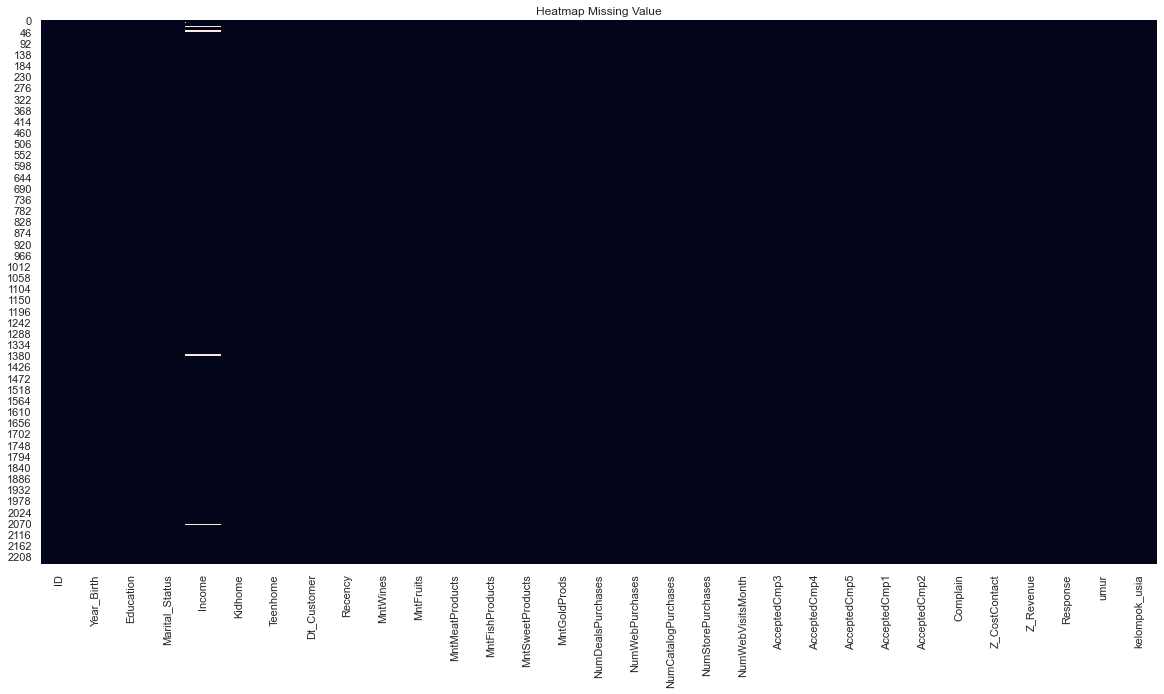

In [248]:
#Check missing value based on heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [249]:
a = (24/2240)*100
print ("jumlah mising value pada kolom income yaitu sebesar", a, "persen")

jumlah mising value pada kolom income yaitu sebesar 1.0714285714285714 persen


In [250]:
numericals = ['Year_Birth','Income','Kidhome','Teenhome','Recency','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4','Complain','Z_CostContact','Z_Revenue','Response','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','umur']
categoricals = ['Education','Marital_Status','kelompok_usia']
belanja = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds']
campaign_numbers = ['NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth']
accepted_campaign = ['AcceptedCmp3','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4','Response']

In [251]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur,kelompok_usia
2120,8832,1976,Master,Together,37509.0,1,0,2012-09-12,24,37,5,56,12,8,5,2,3,0,4,7,0,0,0,0,0,0,3,11,0,46,generasi X
537,6931,1967,Graduation,Divorced,76982.0,0,0,2014-02-15,19,464,151,292,65,60,30,1,8,3,4,4,0,0,1,0,0,0,3,11,1,55,generasi X
185,3518,1983,Graduation,Married,25271.0,1,0,2012-12-05,45,10,1,18,10,4,7,1,1,1,2,9,0,0,0,0,0,0,3,11,0,39,generasi Y
1339,942,1982,Graduation,Single,39660.0,1,0,2012-08-08,36,139,13,78,20,13,36,3,7,1,3,9,0,0,0,0,0,0,3,11,1,40,generasi Y
332,10675,1956,PhD,Married,66334.0,0,1,2013-04-03,82,909,11,218,0,0,23,2,9,3,5,5,0,0,0,0,0,0,3,11,1,66,baby boomers


In [252]:
df.groupby

<bound method DataFrame.groupby of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09

In [253]:
#Memisahkan berdasarkan data type
num_dtypes= ['int16','int32','int64','float16','float32','float64']
#masuk subset
num_df = df.select_dtypes(include = num_dtypes)
numericals = num_df.columns
print (numericals)

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'umur'],
      dtype='object')


In [254]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,53.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000


In [255]:
df[numericals].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,53.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,129.000000


In [256]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [257]:
df[categoricals].describe()

,Education,Marital_Status,kelompok_usia
count,2240,2240,2240
unique,5,8,4
top,Graduation,Married,generasi X
freq,1127,864,1069


In [258]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [259]:
df[belanja].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,44.021875
std,336.597393,39.773434,225.715373,54.628979,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,362.000000


<ipython-input-260-2f05ef96c454>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-260-2f05ef96c454>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-260-2f05ef96c454>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-260-2f05ef96c454>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-260-2f05ef96c454>:7: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-260-2f05ef96c454>:7: UserWarning: Tight layout not applied. tight_layout cannot 

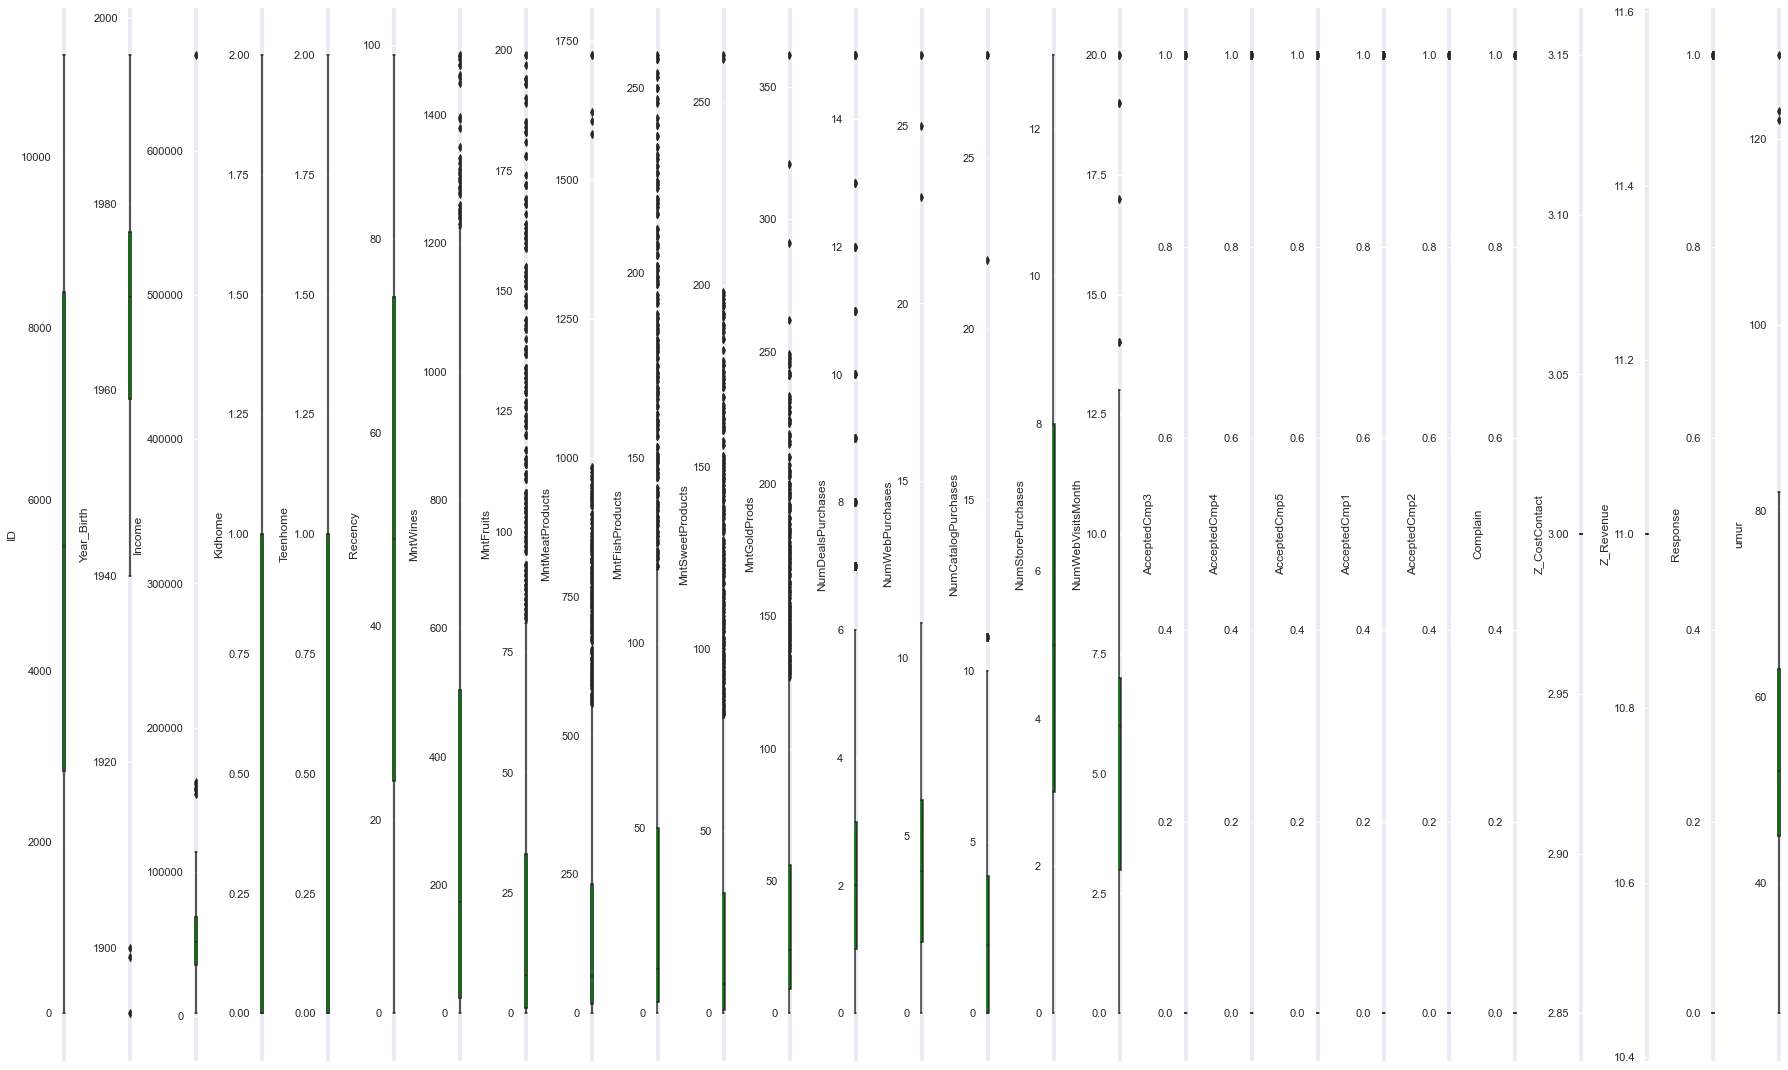

In [260]:
#INDIVIDUAL BOXPLOT
features = numericals
plt.figure(figsize=(25,15))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color = 'green', orient = 'v')
    plt.tight_layout()

<AxesSubplot:xlabel='Income', ylabel='Density'>

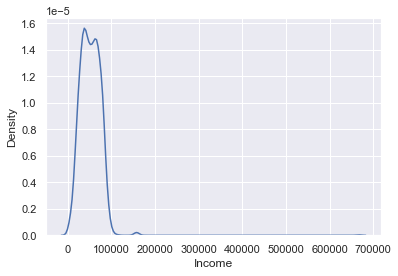

In [261]:
# distribusi income (nilai asli)
sns.kdeplot(df['Income'])

In [262]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot:xlabel='umur', ylabel='Density'>

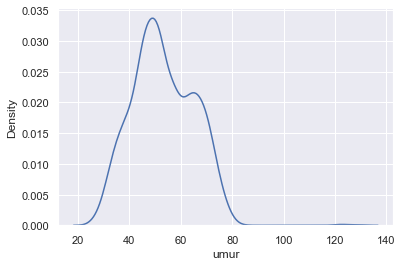

In [263]:
# distribusi umur (nilai asli)
sns.kdeplot(df['umur'])

In [264]:
df['umur'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: umur, dtype: float64

<ipython-input-265-b1d3f48159ea>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-265-b1d3f48159ea>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-265-b1d3f48159ea>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-265-b1d3f48159ea>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-265-b1d3f48159ea>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-265-b1d3f48159ea>:5: UserWarning: Tight layout not applied. tight_layout cannot 

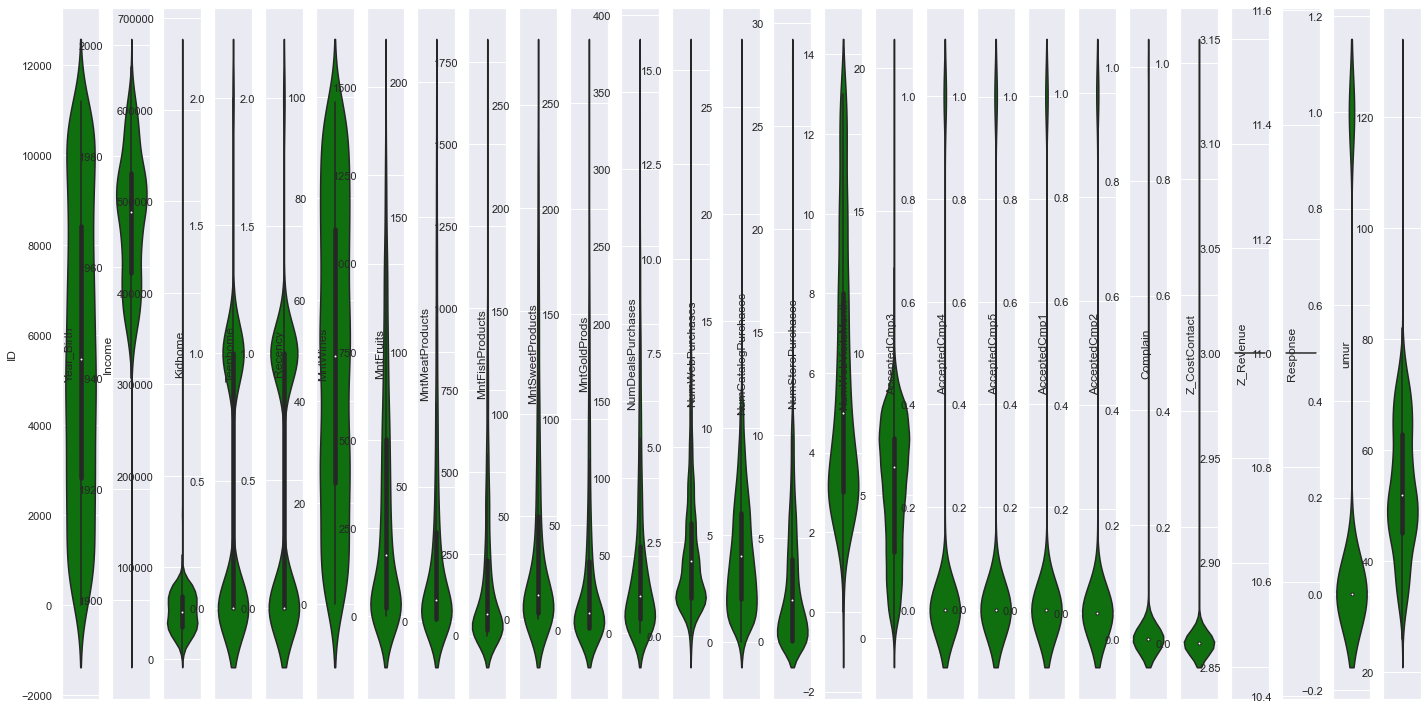

In [265]:
plt.figure(figsize=(20,10))
for i in range (0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.violinplot(y=df[numericals[i]], color='green', orient = 'v')
    plt.tight_layout()

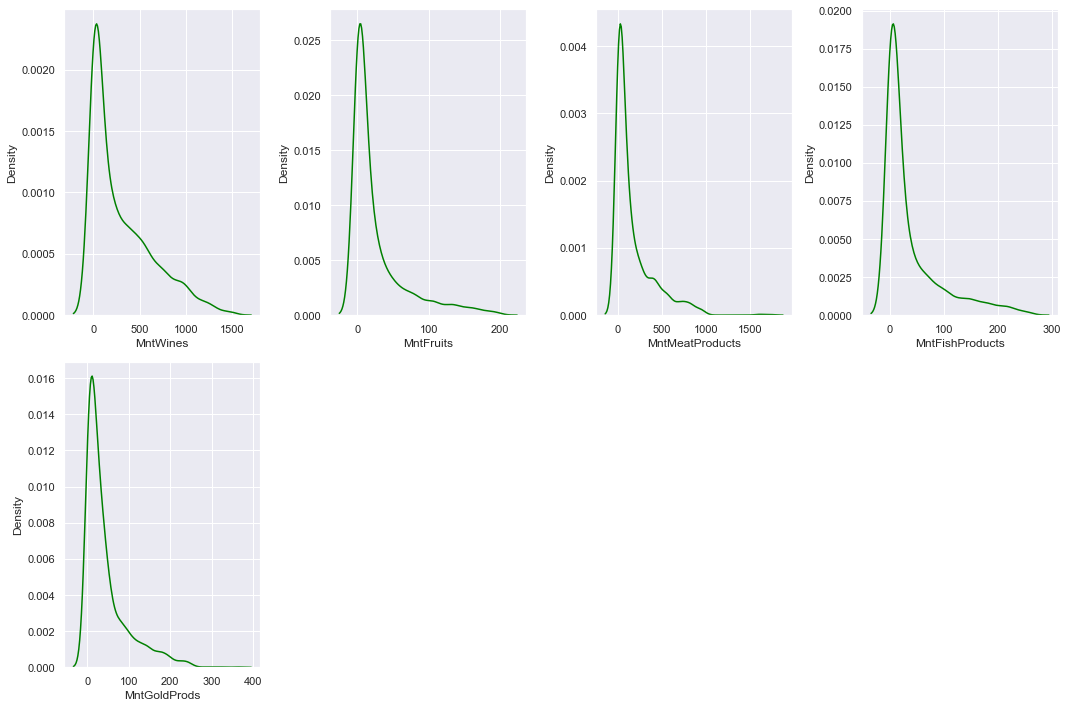

In [266]:
#INDIVIDUAL DISTPLOT
features = belanja
plt.figure(figsize=(15,10))
for i in range (0, len(features)):
    plt.subplot(2,4, i+1)
    sns.kdeplot(x=df[features[i]], color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

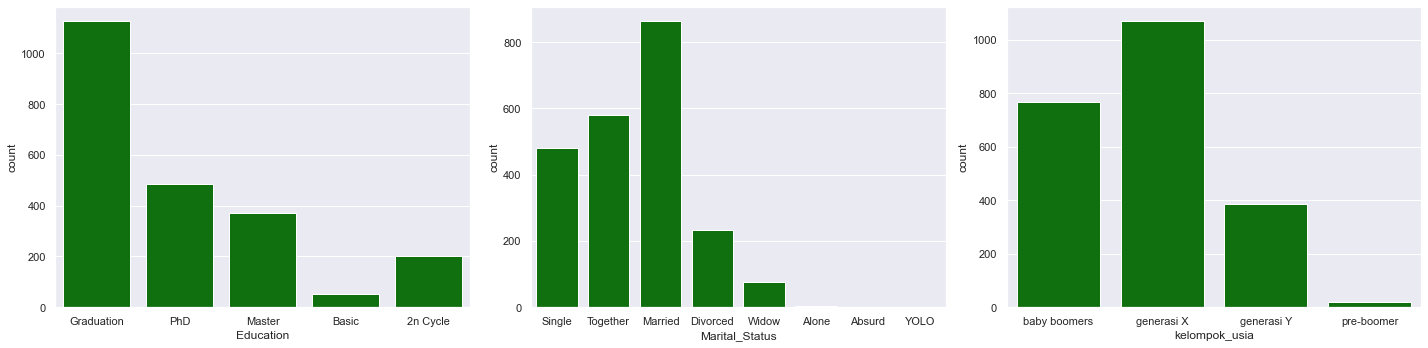

In [267]:
#INDIVIUAL COUNTPLOT (KATEGORICAL)
features = categoricals
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color='green')
    plt.tight_layout()

<AxesSubplot:>

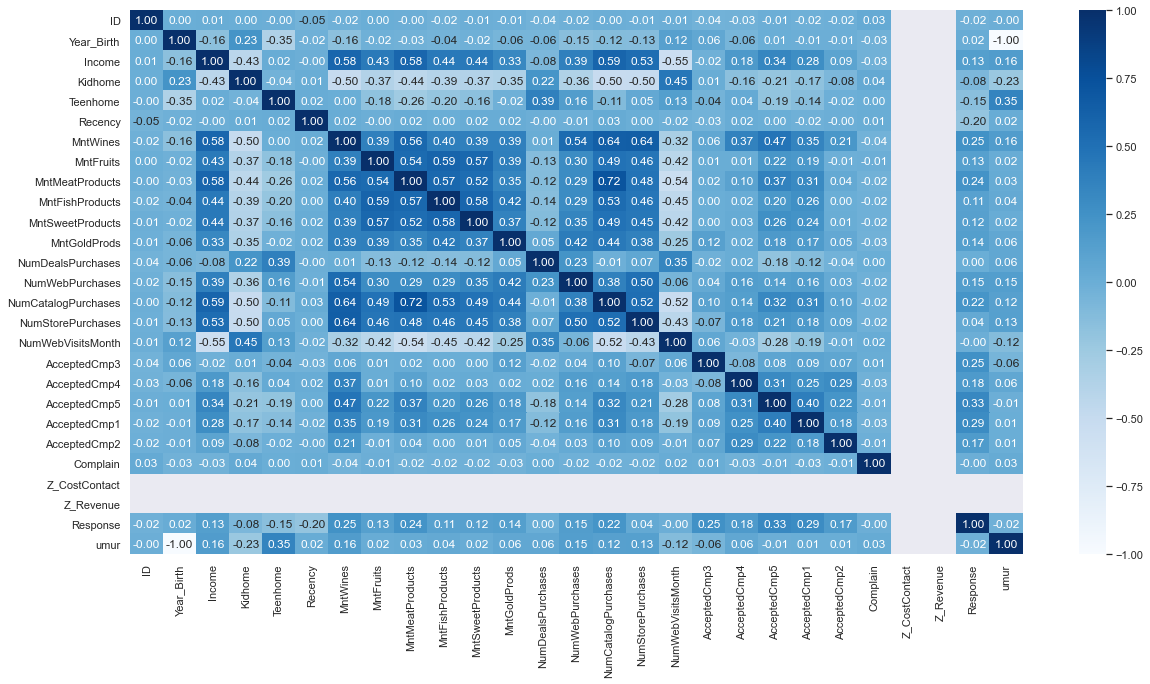

In [268]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [269]:
df2 = df[['Income','Response','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]
df2

,Income,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,58138.0,1,0,0,0,0,0
1,46344.0,0,0,0,0,0,0
2,71613.0,0,0,0,0,0,0
3,26646.0,0,0,0,0,0,0
4,58293.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2235,61223.0,0,0,0,0,0,0
2236,64014.0,0,1,0,0,0,0
2237,56981.0,0,0,0,0,1,0
2238,69245.0,0,0,0,0,0,0


**Korelasi Income terhadap setiap campaign**

<AxesSubplot:>

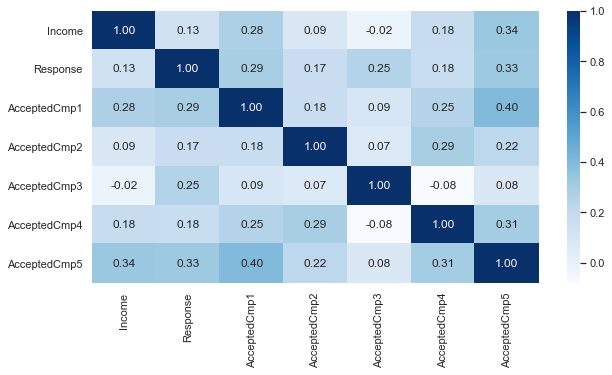

In [270]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), cmap='Blues', annot=True, fmt='.2f')

**Melihat Korelasi antara Marital_status dengan Income**

In [271]:
#melihat korelasi kategori status terhadap income
#categoricals = ['Education','Marital_Status','kelompok_usia']
status_cat = df['Marital_Status']
income_stat = df['Income']

In [272]:
status_cat.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [273]:
myCoding = {'Single': 1, 'Together': 2, 'Married': 3, 'Divorced': 4, 'Widow': 5, 'Alone': 6, 'Absurd': 7, 'YOLO': 8}

In [274]:
df['Marital_Status'] = df['Marital_Status'].replace(myCoding)

In [275]:
status_cat = df['Marital_Status']
status_cat.value_counts()

3    864
2    580
1    480
4    232
5     77
6      3
8      2
7      2
Name: Marital_Status, dtype: int64

In [276]:
newDf = df[['Marital_Status', 'Income']].dropna()
newDf.head()

,Marital_Status,Income
0,1,58138.0
1,1,46344.0
2,2,71613.0
3,2,26646.0
4,3,58293.0


In [277]:
newDf.corr(method="spearman")

,Marital_Status,Income
Marital_Status,1.000000,0.033316
Income,0.033316,1.000000


In [278]:
# !pip install scipy.stats
from scipy.stats import spearmanr

In [280]:
spearmanr(newDf)

SpearmanrResult(correlation=0.033315740591562455, pvalue=0.11691167608557293)

In [281]:
rs = spearmanr(newDf)[0]

if abs(rs) < .10:
    qual = 'Negligible'
elif abs(rs) < .20:
    qual = 'Weak'
elif abs(rs) < .40:
    qual = 'Moderate'
elif abs(rs) < .60:
    qual = 'Relatively strong'
elif abs(rs) < .80:
    qual = 'Strong'
else:
    qual = 'Very strong'
    
qual

'Negligible'

In [285]:
!pip install pingouin
from pingouin import corr

^C


ModuleNotFoundError: No module named 'pingouin'

In [ ]:
corr(status_cat, income_stat, method='spearman')

**Melihat korelasi antara Education terhadap Income**

In [ ]:
education_cat = df['Education']
income_stat = df['Income']

In [ ]:
education_cat.unique()

In [ ]:
education_coding = {'Graduation': 1, 'PhD': 2, 'Master': 3, 'Basic': 4, '2n Cycle': 5}
df['Education'] = df['Education'].replace(education_coding)

In [ ]:
education_cat = df['Education']
education_cat.value_counts()

In [ ]:
corr(education_cat, income_stat, method='spearman')

**Korelasi setiap kategorik terhadap response**

In [ ]:
education_cat = df['Education']
response_stat = df['Response']

Korelasi antara education terhadap response

In [ ]:
corr(education_cat, response_stat, method='spearman')

korelasi antara Status terhadap response

In [ ]:
corr(status_cat, response_stat, method='spearman')

Korelasi antara kelompok usia terhadap response

In [ ]:
usia_cat = df['kelompok_usia']
response_stat = df['Response']

In [289]:
  usia_coding = {'pre-boomer': 1, 'baby boomers': 2, 'generasi X': 3, 'generasi Y': 4, 'generasi Z': 5}


In [290]:
  df['kelompok_usia'] = df['kelompok_usia'].replace(usia_coding)

In [291]:
usia_cat = df['kelompok_usia']
usia_cat.value_counts()

3    1069
2     767
4     385
1      19
Name: kelompok_usia, dtype: int64

In [292]:
usia_cat = df['kelompok_usia']
response_stat = df['Response']

In [293]:
df['kelompok_usia'] = df['kelompok_usia'].replace(myCoding)

In [294]:
usia_cat = df['kelompok_usia']
usia_cat.value_counts()

3    1069
2     767
4     385
1      19
Name: kelompok_usia, dtype: int64

In [295]:
newDf1 = df[['kelompok_usia', 'Response']].dropna()
newDf1.head()

,kelompok_usia,Response
0,2,1
1,2,0
2,3,0
3,4,0
4,4,0


In [296]:
newDf1.corr(method="spearman")

,kelompok_usia,Response
kelompok_usia,1.000000,0.035639
Response,0.035639,1.000000


In [297]:
spearmanr(newDf1)

SpearmanrResult(correlation=0.03563865215236345, pvalue=0.09173359312729917)

<Figure size 2880x1440 with 0 Axes>

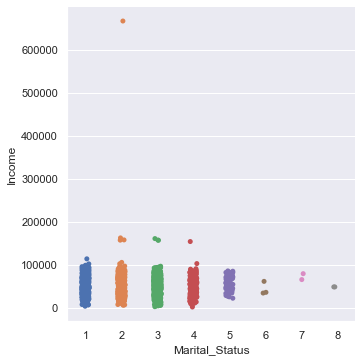

In [298]:
plt.figure(figsize=(40,20))
sns.catplot(data=df, x='Marital_Status', y='Income')

<Figure size 2880x1440 with 0 Axes>

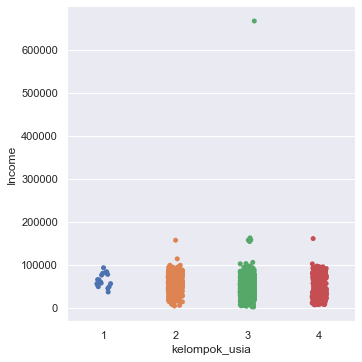

In [299]:
plt.figure(figsize=(40,20))
sns.catplot(data=df, x='kelompok_usia', y='Income')

**Setiap kategorik terhadap Income**

IndexError: ignored

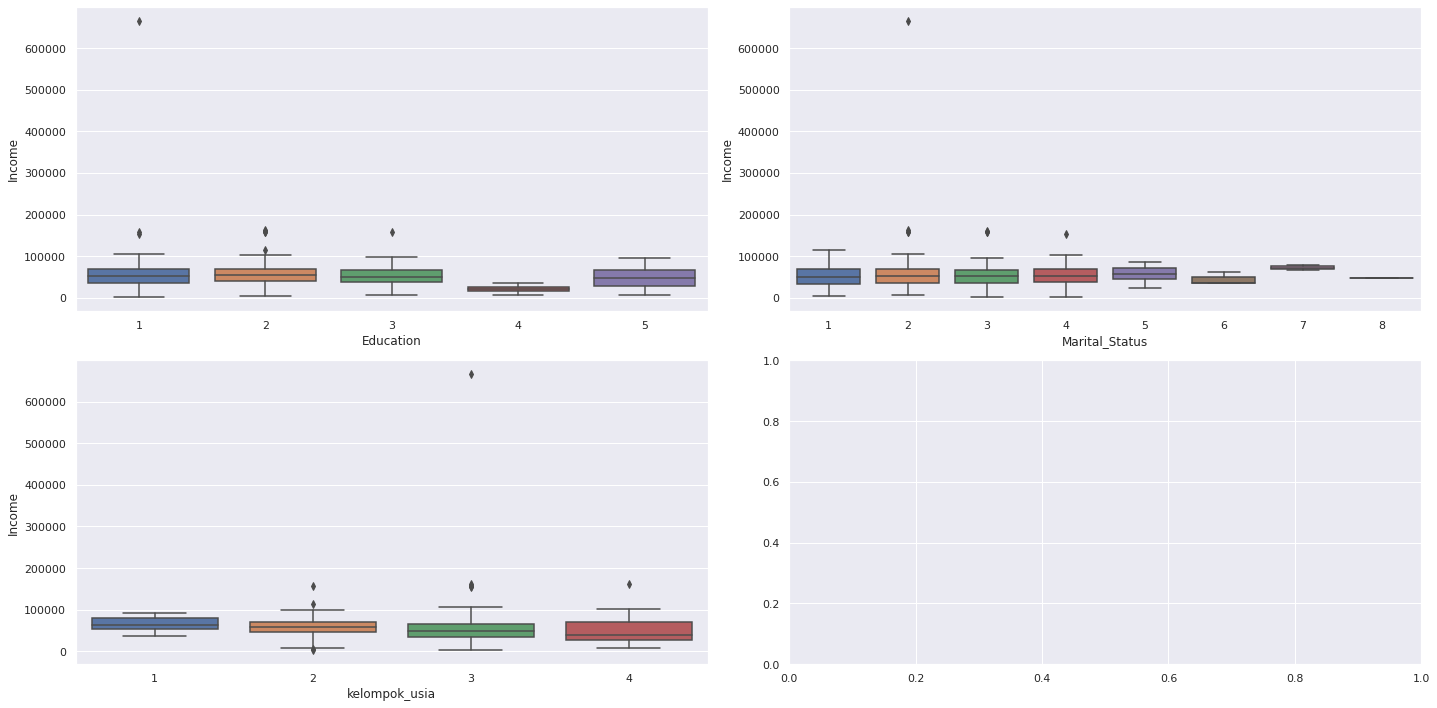

In [ ]:
fig = plt.figure(figsize=(20,10))
for i in range (0, len(df['Income'])): #untuk setiap kolom numerik
    ax = fig.add_subplot(2,2, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.boxplot(ax=ax, data=df, x=categoricals[i], y=df['Income']) #gambar catplot/ stripplot
    plt.tight_layout()

**Martial Status terhadap semua numericals**

In [ ]:
fig = plt.figure(figsize=(80,30))
for i in range (0, len(numericals)): #untuk setiap kolom numerik
    ax = fig.add_subplot(10,10, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.boxplot(ax=ax, data=df, x='Marital_Status', y=numericals[i]) #gambar catplot/ stripplot
    plt.tight_layout()

**Martial_status terhadap jumlah belanja**

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(3,3, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.boxplot(ax=ax, data=df, x='Marital_Status', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

**Martial Status terhadap trigger pembelian karena apa**

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(campaign_numbers)): #untuk setiap kolom numerik
    ax = fig.add_subplot(3,3, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=campaign_numbers[i]) #gambar catplot/ stripplot
    plt.tight_layout()

**Edcuation terhadap semua numericals**

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(numericals)): #untuk setiap kolom numerik
    ax = fig.add_subplot(3,3, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.stripplot(ax=ax, data=df, x='Education', y=numericals[i]) #gambar catplot/ stripplot
    plt.tight_layout()

**Kategori Edukasi terhadap pembelian produk**

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(3,3, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.stripplot(ax=ax, data=df, x='Education', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

**Edukasi terhadap trigger pembelian karena apa**

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(campaign_numbers)): #untuk setiap kolom numerik
    ax = fig.add_subplot(3,3, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.stripplot(ax=ax, data=df, x='Education', y=campaign_numbers[i]) #gambar catplot/ stripplot
    plt.tight_layout()

Melihat setiap Trigger pembelian terhadap response

In [ ]:
fig = plt.figure(figsize=(25,15))
#'NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth'
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(3,3, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.boxplot(ax=ax, data=df, x='NumDealsPurchases', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(3,3, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.boxplot(ax=ax, data=df, x='NumWebPurchases', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

**Complain terhadap setiap pembelajaan**

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(3,3, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.stripplot(ax=ax, data=df, x='Complain', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

**Setiap campaign ke berapa terhadap jumlah pembelian produk**

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(5,5, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp1', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(5,5, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp2', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(5,5, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp3', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(5,5, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp4', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(25,15))
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(5,5, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.stripplot(ax=ax, data=df, x='AcceptedCmp5', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

**INSIGHT**

1. Perbedaan grafik rata-rata pembelian berdasarkan ID vs usia, pendapatan, status, dan pendidikan.
   
   Untuk Education mempunyai pengaruh terhadap Income dapat dilihat  kategori graduation memiliki titik income tertinggi hal ini disebabkan semakin tinggi pendidikan bisa mempengaruhi income , sedangkan yang terendah ada di Basic.
   
2. Berdasarkan rata-ratanya, produk mana yang memiliki tingkat  pembelian tertinggi? (Jumlah customer vs Produk)
   
   Untuk tingkat pembelian tertinggi pada produk MntWines, hal ini disebebkan banyaknya jumlah customer
   
3. Berdasarkan rata-ratanya, produk mana yang memiliki tingkat complain tertinggi? (Complain vs Produk)
  
  Untuk tingkat pembelian tertinggi pada produk MntWines, hal ini disebebkan banyaknya jumlah customer
   
   Untuk tingkat complain tertinggi ada di produk MntFruits
   
4. Berdasarkan campaign yang sudah dilakukan, campaign mana yang memiliki tingkat accepted campaign tertinggi? (campaign_numbers vs accepted_campaign)
5. Terdapat missing Value pada variabel income sebesar 1.07% dari total data variabel Income
6. Marketing Campaign terbanyak saat ini yang didapat yaitu dari kelompok usia generasi X, yaitu yang lahir pada tahun 1965 - 1980

   
    Untuk tingkat accepted campaign tertinggi pada campaign ke 4

**PENGUJIAN STATISTIK**
1. pengaruh income dengan tingkat pembelian produk 
2. Pengaruh campaign dengan tingkat pembelian produk   
3. Pengaruh campaign dengan accepted campaign 

In [ ]:
#1.Perbedaan grafik rata-rata pembelian berdasarkan ID vs usia, pendapatan, status, dan pendidikan.
# Untuk Education mempunyai pengaruh terhadap Income dapat dilihat kategori graduation memiliki titik income tertinggi hal ini disebabkan semakin tinggi pendidikan bisa mempengaruhi income , sedangkan yang terendah ada di Basic.
fig = plt.figure(figsize=(25,15))
for i in range (0, len(belanja)): #untuk setiap kolom numerik
    ax = fig.add_subplot(3,3, i+1) #Set posisi catplot / stripplotnya pada layout
    sns.boxplot(ax=ax, data=df, x='ID', y=belanja[i]) #gambar catplot/ stripplot
    plt.tight_layout()

Rata-rata pembelian berdasarkan usia customer

In [ ]:
dfn = df.groupby(['Kelompok_usia'])['umur'].mean().reset_index()
sns.barplot(x='ID', y='Kelompok_usia', data=dfn, linewidth = 5)
plt.xticks(rotation=15)
plt.title('Top Selling Product by Customer',color='red',fontsize=12,fontweight='bold')
plt.ylim(0, 90)

In [ ]:
belanja= ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds']

df1 = df.groupby['belanja']['ID'].nunique().reset_index(name='unique_customer')
x1 = df1['belanja']
y1 = df1['unique_customer']
barplot = plt.bar(x1, y1, width = 0.7)
plt.xticks(fontsize = 10, rotation = 45)
plt.xlabel("belanja")
plt.ylabel("unique_customer")
plt.title('Top Selling Product by Customer')
plt.ylim(0, 100)
plt.bar_label(barplot, labels=y1)
plt.show()

## **Stage** **2**
#### **Data Preprocessing**

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   int64  
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [302]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
umur                    0
kelompok_usia           0
dtype: int64

In [303]:
#Mengecek nilai null di kolom Income

df_null = df[df['Income'].isnull()]
df_null = df_null.sort_values(['Education', 'umur'], ascending = [True, True])
df_null

#Mengurutkan nilai null berdasarkan tingkat edukasi dan umur

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur,kelompok_usia
2228,8720,1978,2n Cycle,2,NaN,0,0,2012-08-12,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0,44,3
71,10629,1973,2n Cycle,3,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,49,3
1383,4345,1964,2n Cycle,1,NaN,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,3,11,0,58,2
312,2437,1989,Graduation,3,NaN,0,0,2013-06-03,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,3,11,0,33,4
27,5255,1986,Graduation,1,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,36,4
10,1994,1983,Graduation,3,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,39,4
58,8557,1982,Graduation,1,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,40,4
2078,5079,1971,Graduation,3,NaN,1,1,2013-03-03,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,3,11,0,51,3
319,2863,1970,Graduation,1,NaN,1,2,2013-08-23,67,738,20,172,52,50,20,6,2,3,10,7,0,1,0,1,0,0,3,11,0,52,3
133,1295,1963,Graduation,3,NaN,0,1,2013-08-11,96,231,65,196,38,71,124,1,6,5,7,4,0,0,0,0,0,0,3,11,0,59,2


In [304]:
#Mencari nilai median income berdasarkan tingkat edukasi dan umur
df_groupby = df.groupby(['Education', 'umur']).agg(Income = ('Income', 'median')).reset_index()
df_groupby

,Education,umur,Income
0,2n Cycle,26,7500.0
1,2n Cycle,27,81937.0
2,2n Cycle,30,87000.0
3,2n Cycle,31,40905.5
4,2n Cycle,32,37966.5
...,...,...,...
227,PhD,78,69165.0
228,PhD,79,53230.5
229,PhD,81,93027.0
230,PhD,82,51141.0


In [305]:
#Mencari nilai income yang hanya dibutuhkan sesuai dengan tingkat edukasi dan umur nilai null

df_groupby_2nCycle = df_groupby[(df_groupby['Education'] == '2n Cycle') &
                                ((df_groupby['umur'] == 44) | (df_groupby['umur'] == 49) |
                                 (df_groupby['umur'] == 58))]

df_groupby_Graduation = df_groupby[(df_groupby['Education'] == 'Graduation') &
                        ((df_groupby['umur'] == 33) | (df_groupby['umur'] == 36) | 
                         (df_groupby['umur'] == 39) | (df_groupby['umur'] == 40) | 
                         (df_groupby['umur'] == 51) | (df_groupby['umur'] == 52) | 
                         (df_groupby['umur'] == 59) | (df_groupby['umur'] == 64) | 
                         (df_groupby['umur'] == 65) | (df_groupby['umur'] == 67) | 
                         (df_groupby['umur'] == 71))]

df_groupby_Master = df_groupby[(df_groupby['Education'] == 'Master') & 
                               ((df_groupby['umur'] == 49) | (df_groupby['umur'] == 52) |
                                (df_groupby['umur'] == 53) | (df_groupby['umur'] == 68) | 
                                (df_groupby['umur'] == 79))]

df_groupby_PhD = df_groupby[(df_groupby['Education'] == 'PhD') & 
                            ((df_groupby['umur'] == 41) | (df_groupby['umur'] == 50) | 
                             (df_groupby['umur'] == 61) | (df_groupby['umur'] == 63) | 
                             (df_groupby['umur'] == 65))]

df_groupby_null_median = pd.concat([df_groupby_2nCycle, df_groupby_Graduation, df_groupby_Master, df_groupby_PhD], ignore_index = True)

df_groupby_null = df_groupby_null_median.rename(columns = {'Income median' : 'Income'})

df_groupby_null

,Education,umur,Income
0,2n Cycle,44,36975.0
1,2n Cycle,49,35688.0
2,2n Cycle,58,62905.0
3,Graduation,33,34541.5
4,Graduation,36,38508.0
5,Graduation,39,37292.0
6,Graduation,40,47737.5
7,Graduation,51,42075.5
8,Graduation,52,53187.0
9,Graduation,59,52425.5


In [306]:
#Menghapus kolom income yang mempunyai nilai null 

df_null = df_null.drop('Income', axis = 1)
df_null

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur,kelompok_usia
2228,8720,1978,2n Cycle,2,0,0,2012-08-12,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0,44,3
71,10629,1973,2n Cycle,3,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,49,3
1383,4345,1964,2n Cycle,1,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,3,11,0,58,2
312,2437,1989,Graduation,3,0,0,2013-06-03,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,3,11,0,33,4
27,5255,1986,Graduation,1,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,36,4
10,1994,1983,Graduation,3,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,39,4
58,8557,1982,Graduation,1,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,40,4
2078,5079,1971,Graduation,3,1,1,2013-03-03,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,3,11,0,51,3
319,2863,1970,Graduation,1,1,2,2013-08-23,67,738,20,172,52,50,20,6,2,3,10,7,0,1,0,1,0,0,3,11,0,52,3
133,1295,1963,Graduation,3,0,1,2013-08-11,96,231,65,196,38,71,124,1,6,5,7,4,0,0,0,0,0,0,3,11,0,59,2


In [307]:
#Memasukkan nilai median income berdasarkan tingkat edukasi dan umur

df_null = df_null.merge(df_groupby_null,
              left_on = ['Education', 'umur'],
              right_on = ['Education', 'umur'],
              how = 'inner')

df_null

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur,kelompok_usia,Income
0,8720,1978,2n Cycle,2,0,0,2012-08-12,53,32,2,1607,12,4,22,0,0,0,1,0,0,1,0,0,0,0,3,11,0,44,3,36975.0
1,10629,1973,2n Cycle,3,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0,49,3,35688.0
2,4345,1964,2n Cycle,1,1,1,2014-01-12,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,3,11,0,58,2,62905.0
3,2437,1989,Graduation,3,0,0,2013-06-03,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,3,11,0,33,4,34541.5
4,5255,1986,Graduation,1,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,36,4,38508.0
5,1994,1983,Graduation,3,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0,39,4,37292.0
6,8557,1982,Graduation,1,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0,40,4,47737.5
7,5079,1971,Graduation,3,1,1,2013-03-03,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,3,11,0,51,3,42075.5
8,2863,1970,Graduation,1,1,2,2013-08-23,67,738,20,172,52,50,20,6,2,3,10,7,0,1,0,1,0,0,3,11,0,52,3,53187.0
9,1295,1963,Graduation,3,0,1,2013-08-11,96,231,65,196,38,71,124,1,6,5,7,4,0,0,0,0,0,0,3,11,0,59,2,52425.5


In [308]:
#Membuang baris yang mempunyai nilai null
df = df.dropna()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur,kelompok_usia
0,5524,1957,Graduation,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,2
1,2174,1954,Graduation,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,2
2,4141,1965,Graduation,2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,3
3,6182,1984,Graduation,2,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,4
4,5324,1981,PhD,3,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,3,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,55,3
2236,4001,1946,PhD,2,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,76,2
2237,7270,1981,Graduation,4,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,41,4
2238,8235,1956,Master,2,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,66,2


In [309]:
#Menggabungkan data frame yang memiliki nilai null yang sudah ditambahkan dengan data frame awal
df = df.append(df_null)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur,kelompok_usia
0,5524,1957,Graduation,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,65,2
1,2174,1954,Graduation,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,68,2
2,4141,1965,Graduation,2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,57,3
3,6182,1984,Graduation,2,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,38,4
4,5324,1981,PhD,3,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,41,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,1612,1981,PhD,1,50945.0,1,0,2013-05-31,82,23,0,15,0,2,7,2,3,0,3,6,0,0,0,0,0,0,3,11,0,41,4
20,3769,1972,PhD,2,56175.5,1,0,2014-03-02,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,3,11,0,50,3
21,8268,1961,PhD,3,63342.0,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0,61,2
22,7281,1959,PhD,1,53195.5,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0,63,2


In [310]:
# Cek data duplicate

df.duplicated().sum()

# tidak terdapat data yang duplikat

0

In [311]:
# Handling Outlier Berdsarkan Z-Score
# Outlier umur dibuang karena dianggap tidak memiliki dampak yang signifikan jika outliernya dibuang

z_scores = np.abs(stats.zscore(df['umur']))
filtered_entries = (z_scores < 3)
df = df[filtered_entries]

df.describe()
# Terdapat 3 outlier yang dibuang berdasarkan kolom umur

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,umur,kelompok_usia
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.0,2237.0,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,2.497094,52212.529057,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.072865,0.074654,0.072418,0.064372,0.013411,0.008941,3.0,11.0,0.149307,53.098346,2.814931
std,3245.118591,11.701917,1.073596,25065.155065,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.259974,0.262890,0.259237,0.245469,0.115052,0.094152,0.0,0.0,0.356471,11.701917,0.713836
min,0.000000,1940.000000,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,26.000000,1.000000
25%,2829.000000,1959.000000,2.000000,35441.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000,2.000000
50%,5455.000000,1970.000000,3.000000,51369.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,52.000000,3.000000
75%,8427.000000,1977.000000,3.000000,68316.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,63.000000,3.000000
max,11191.000000,1996.000000,8.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,82.000000,4.000000


In [ ]:
#Menghitung jumlah anak dalam satu ID
df['jumlah_anak'] = df['Kidhome'] + df['Teenhome']
df

In [ ]:
# Membuat kolom baru jika mempunyai anak atau tidak berdasarkan jumlah anak
anak = []
for index, kolom in df.iterrows():
    punya_anak = kolom['jumlah_anak']
    if punya_anak > 0:
        punya_tanggungan = 1
    else:
        punya_tanggungan = 0
    
    anak.append(punya_tanggungan)
        
df['mempunyai_anak'] = anak
df

In [314]:
#Mengecek marital status
df.groupby('Marital_Status').agg({'ID' : 'nunique'})

,ID
Marital_Status,
1,479
2,579
3,864
4,231
5,77
6,3
7,2
8,2


In [ ]:
# Membuat kolom baru status berdasarkan marital status jika single atau bukan single

status = []
for index, kolom in df.iterrows():
    if kolom['Marital_Status'] == 'Married' or kolom['Marital_Status'] == 'Together' :
        statusnya = 'Not Single'
    else:
        statusnya = 'Single'
    
    status.append(statusnya)
        
df['Status'] = status
df['Status'].unique()

In [ ]:
#Menghitung total campaign yang diterima
df['Total_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df.sort_values(['ID'], ascending = [True])

In [349]:
#Membuang fitur yang redundan
df_selection = df.drop(['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome',
                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                        'Complain', 'Z_CostContact', 'Z_Revenue'], axis=1)
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 23
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Education            2237 non-null   object 
 2   Income               2237 non-null   float64
 3   Dt_Customer          2237 non-null   object 
 4   Recency              2237 non-null   int64  
 5   MntWines             2237 non-null   int64  
 6   MntFruits            2237 non-null   int64  
 7   MntMeatProducts      2237 non-null   int64  
 8   MntFishProducts      2237 non-null   int64  
 9   MntSweetProducts     2237 non-null   int64  
 10  MntGoldProds         2237 non-null   int64  
 11  NumDealsPurchases    2237 non-null   int64  
 12  NumWebPurchases      2237 non-null   int64  
 13  NumCatalogPurchases  2237 non-null   int64  
 14  NumStorePurchases    2237 non-null   int64  
 15  NumWebVisitsMonth    2237 non-null   int

### **Feature** **Transformation**

Tranformasi fitur yang digunakan adalah Log Transformation karena terdapat data yang right-skewed (menceng ke kanan)

In [369]:
df_new = df_selection.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 23
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Education            2237 non-null   object 
 2   Income               2237 non-null   float64
 3   Dt_Customer          2237 non-null   object 
 4   Recency              2237 non-null   int64  
 5   MntWines             2237 non-null   int64  
 6   MntFruits            2237 non-null   int64  
 7   MntMeatProducts      2237 non-null   int64  
 8   MntFishProducts      2237 non-null   int64  
 9   MntSweetProducts     2237 non-null   int64  
 10  MntGoldProds         2237 non-null   int64  
 11  NumDealsPurchases    2237 non-null   int64  
 12  NumWebPurchases      2237 non-null   int64  
 13  NumCatalogPurchases  2237 non-null   int64  
 14  NumStorePurchases    2237 non-null   int64  
 15  NumWebVisitsMonth    2237 non-null   int

<AxesSubplot:xlabel='Income', ylabel='Density'>

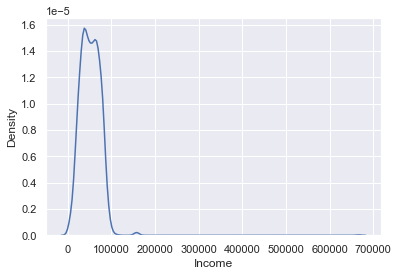

In [351]:
# distribusi income (nilai asli)
sns.kdeplot(df_new['Income'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

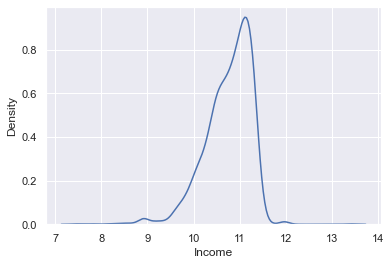

In [352]:
# distribusi gaji (setelah log transformation)
sns.kdeplot(np.log(df_new['Income']))
# lebih mendekati distribusi normal!

In [370]:
# kita tranformasi
df_new['log_gaji'] = np.log(df_new['Income'])

# drop kolom gaji (nilai asli)
df_new = df_new.drop(columns='Income')

In [371]:
df_new.describe()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,umur,kelompok_usia,jumlah_anak,mempunyai_anak,Total_campaign,log_gaji
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.149307,53.098346,2.814931,0.950827,0.715244,0.297720,10.754032
std,3245.118591,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.356471,11.701917,0.713836,0.752037,0.451399,0.678615,0.503727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,7.455877
25%,2829.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,45.000000,2.000000,0.000000,0.000000,0.000000,10.475625
50%,5455.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,52.000000,3.000000,1.000000,1.000000,0.000000,10.846790
75%,8427.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,63.000000,3.000000,1.000000,1.000000,0.000000,11.131899
max,11191.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,82.000000,4.000000,3.000000,1.000000,4.000000,13.410044


<AxesSubplot:xlabel='umur', ylabel='Density'>

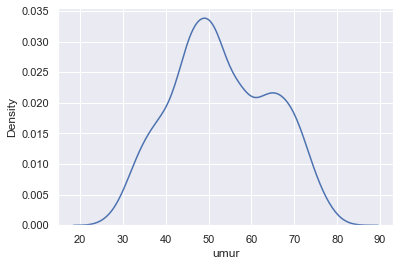

In [355]:
# distribusi umur (nilai asli)
sns.kdeplot(df_new['umur'])

#setelah dicut outliernya, nilai umur terdistribusi normal, tidak perlu dilakukan log transformation

In [356]:
df_new.describe()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,umur,kelompok_usia,jumlah_anak,mempunyai_anak,Total_campaign,log_gaji
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.149307,53.098346,2.814931,0.950827,0.715244,0.297720,10.754032
std,3245.118591,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.356471,11.701917,0.713836,0.752037,0.451399,0.678615,0.503727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,7.455877
25%,2829.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,45.000000,2.000000,0.000000,0.000000,0.000000,10.475625
50%,5455.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,52.000000,3.000000,1.000000,1.000000,0.000000,10.846790
75%,8427.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,63.000000,3.000000,1.000000,1.000000,0.000000,11.131899
max,11191.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,82.000000,4.000000,3.000000,1.000000,4.000000,13.410044


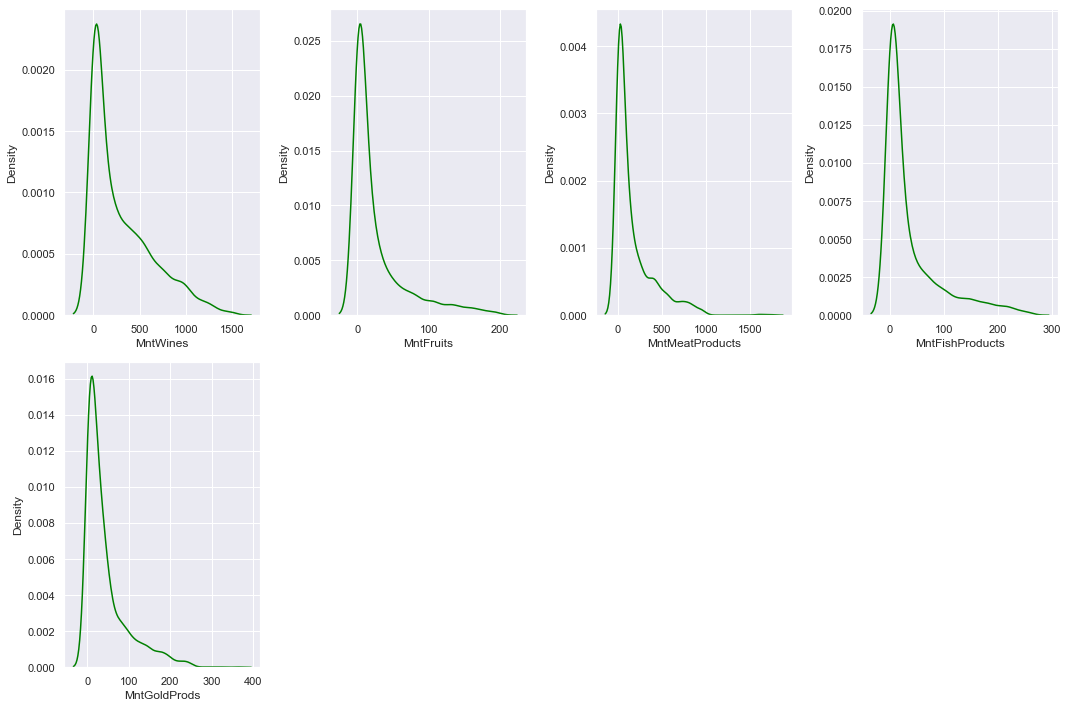

In [357]:
#Distribusi amount spend in product (nilai asli)
features = belanja
plt.figure(figsize=(15,10))
for i in range (0, len(features)):
    plt.subplot(2,4, i+1)
    sns.kdeplot(x=df[features[i]], color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

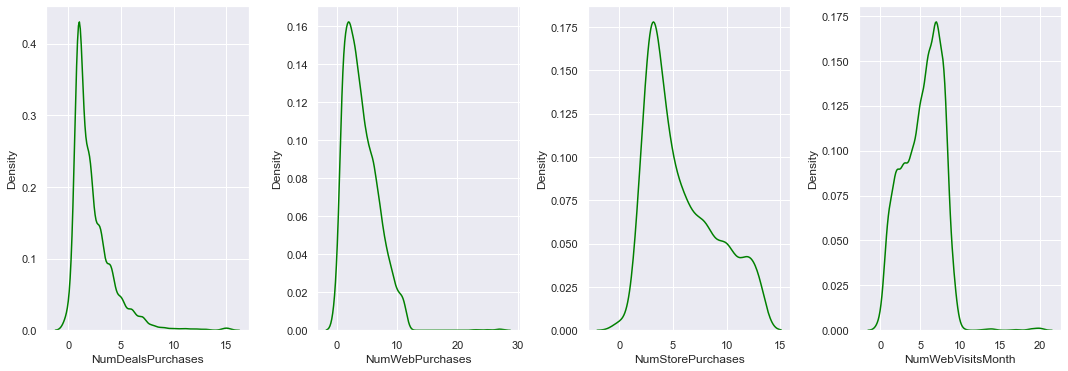

In [358]:
#Distribusi number of purchases (nilai asli)
features = campaign_numbers
plt.figure(figsize=(15,10))
for i in range (0, len(features)):
    plt.subplot(2,4, i+1)
    sns.kdeplot(x=df[features[i]], color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

Distribusi data amount spent in Products and number of purchases terlihat right skewed, namun karena di data tersebut terdapat nilai 0, maka alih-alih melakukan log transformation, akan dilakukan standardisasi untuk data-data tersebut

### **Standardization**

In [372]:
from sklearn.preprocessing import StandardScaler

# umur, log gaji & amount spend in product kita standarisasi (karena distribusi datanya sudah mendekati normal)
df_new['umur_std'] = StandardScaler().fit_transform(df_new['umur'].values.reshape(len(df_new), 1))
df_new['log_gaji_std'] = StandardScaler().fit_transform(df_new['log_gaji'].values.reshape(len(df_new), 1))
df_new['MntWines_std'] = StandardScaler().fit_transform(df_new['MntWines'].values.reshape(len(df_new), 1))
df_new['MntFruits_std'] = StandardScaler().fit_transform(df_new['MntFruits'].values.reshape(len(df_new), 1))
df_new['MntMeatProducts_std'] = StandardScaler().fit_transform(df_new['MntMeatProducts'].values.reshape(len(df_new), 1))
df_new['MntFishProducts_std'] = StandardScaler().fit_transform(df_new['MntFishProducts'].values.reshape(len(df_new), 1))
df_new['MntGoldProds_std'] = StandardScaler().fit_transform(df_new['MntGoldProds'].values.reshape(len(df_new), 1))
df_new['NumDealsPurchases'] = StandardScaler().fit_transform(df_new['MntGoldProds'].values.reshape(len(df_new), 1))
df_new['MNumWebPurchases'] = StandardScaler().fit_transform(df_new['MntGoldProds'].values.reshape(len(df_new), 1))
df_new['NumStorePurchases'] = StandardScaler().fit_transform(df_new['MntGoldProds'].values.reshape(len(df_new), 1))
df_new['NumWebVisitsMonth'] = StandardScaler().fit_transform(df_new['MntGoldProds'].values.reshape(len(df_new), 1))


In [373]:
# cek keberhasilan feature transformation
df_new.describe()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,umur,kelompok_usia,jumlah_anak,mempunyai_anak,Total_campaign,log_gaji,umur_std,log_gaji_std,MntWines_std,MntFruits_std,MntMeatProducts_std,MntFishProducts_std,MntGoldProds_std,MNumWebPurchases
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2.237000e+03,2237.000000,2237.000000,2.237000e+03,2.237000e+03,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03
mean,5590.726419,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,-5.752117e-17,4.087170,2.662494,-5.752117e-17,-5.752117e-17,0.149307,53.098346,2.814931,0.950827,0.715244,0.297720,10.754032,7.504055e-17,7.799478e-16,4.330217e-17,-7.303054e-17,-6.588382e-17,1.847477e-17,-5.752117e-17,-5.752117e-17
std,3245.118591,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.000224e+00,2.779461,2.923456,1.000224e+00,1.000224e+00,0.356471,11.701917,0.713836,0.752037,0.451399,0.678615,0.503727,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.448586e-01,0.000000,0.000000,-8.448586e-01,-8.448586e-01,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,7.455877,-2.316236e+00,-6.548963e+00,-9.034065e-01,-6.616060e-01,-7.398445e-01,-6.868864e-01,-8.448586e-01,-8.448586e-01
25%,2829.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,-6.719236e-01,2.000000,0.000000,-6.719236e-01,-6.719236e-01,0.000000,45.000000,2.000000,0.000000,0.000000,0.000000,10.475625,-6.922077e-01,-5.528172e-01,-8.320839e-01,-6.364216e-01,-6.689259e-01,-6.319692e-01,-6.719236e-01,-6.719236e-01
50%,5455.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,-3.836987e-01,4.000000,2.000000,-3.836987e-01,-3.836987e-01,0.000000,52.000000,3.000000,1.000000,1.000000,0.000000,10.846790,-9.388133e-02,1.841856e-01,-3.863176e-01,-4.601307e-01,-4.428728e-01,-4.672176e-01,-3.836987e-01,-3.836987e-01
75%,8427.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,2.311812e-01,6.000000,4.000000,2.311812e-01,2.311812e-01,0.000000,63.000000,3.000000,1.000000,1.000000,0.000000,11.131899,8.463457e-01,7.503109e-01,5.943684e-01,1.694798e-01,2.884754e-01,2.284002e-01,2.311812e-01,2.311812e-01
max,11191.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,6.110971e+00,27.000000,28.000000,6.110971e+00,6.110971e+00,1.000000,82.000000,4.000000,3.000000,1.000000,4.000000,13.410044,2.470374e+00,5.273897e+00,3.533455e+00,4.350093e+00,6.906069e+00,4.054298e+00,6.110971e+00,6.110971e+00


### **Feature** **Encoding**

In [374]:
df_new.head()

,ID,Education,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,umur,kelompok_usia,jumlah_anak,mempunyai_anak,Status,Total_campaign,log_gaji,umur_std,log_gaji_std,MntWines_std,MntFruits_std,MntMeatProducts_std,MntFishProducts_std,MntGoldProds_std,MNumWebPurchases
0,5524,Graduation,2012-09-04,58,635,88,546,172,88,88,0.846061,8,10,0.846061,0.846061,1,65,2,0,0,Single,0,10.970575,1.017296,0.429978,0.983671,1.554623,1.680253,2.461700,0.846061,0.846061
1,2174,Graduation,2014-03-08,38,11,1,6,2,1,6,-0.729569,1,1,-0.729569,-0.729569,0,68,2,2,1,Single,0,10.743847,1.273722,-0.020223,-0.870717,-0.636422,-0.713250,-0.650275,-0.729569,-0.729569
2,4141,Graduation,2013-08-21,26,426,49,127,111,21,42,-0.037829,8,2,-0.037829,-0.037829,0,57,3,0,0,Single,0,11.179032,0.333495,0.843900,0.362570,0.572430,-0.176928,1.345050,-0.037829,-0.037829
3,6182,Graduation,2014-02-10,26,11,4,20,10,3,5,-0.748784,2,0,-0.748784,-0.748784,0,38,4,1,1,Single,0,10.190394,-1.290534,-1.119183,-0.870717,-0.560868,-0.651196,-0.503829,-0.748784,-0.748784
4,5324,PhD,2014-01-19,94,173,43,118,46,27,15,-0.556634,5,3,-0.556634,-0.556634,0,41,4,1,1,Single,0,10.973237,-1.034108,0.435265,-0.389289,0.421324,-0.216820,0.155177,-0.556634,-0.556634


In [375]:
cats_updated = ['Education', 'kelompok_usia', 'Status']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df_new[col].value_counts())
  print('---'*10, '\n')

value counts of column Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64
------------------------------ 

value counts of column kelompok_usia
3    1069
2     767
4     385
1      16
Name: kelompok_usia, dtype: int64
------------------------------ 

value counts of column Status
Single    2237
Name: Status, dtype: int64
------------------------------ 



Strategi encoding
* `Education`,`kelompok_usia` & `Status` \: label encoding

In [376]:
# kelompok_usia, pendidikan, dan status
#mapping kelompok usia sudah dilakukan ketika EDA untuk visualisasi, namun jika ingin melakukan mapping ulang, berikut tahapannya:

#mapping_kelompok_usia = {
#    'pre-boomer' : 0,
#    'baby boomers' : 1,
#    'generasi X' : 2,
#   'generasi Y' : 3,
#    'generasi Z' : 4
#}

mapping_pendidikan = {
    'Basic' : 0,
    'Graduation' : 1,
    '2n Cycle' : 2,
    'Master' : 3,
    'PhD' : 4
}

mapping_status = {
    'Not Single' : 0,
    'Single' : 1
}

#df_new['kelompok_usia'] = df_new['kelompok_usia'].map(mapping_kelompok_usia)
df_new['Education'] = df_new['Education'].map(mapping_pendidikan)
df_new['Status'] = df_new['Status'].map(mapping_status)

In [377]:
pd.set_option('display.max_column', None)

In [378]:
df_new.head()

,ID,Education,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,umur,kelompok_usia,jumlah_anak,mempunyai_anak,Status,Total_campaign,log_gaji,umur_std,log_gaji_std,MntWines_std,MntFruits_std,MntMeatProducts_std,MntFishProducts_std,MntGoldProds_std,MNumWebPurchases
0,5524,1,2012-09-04,58,635,88,546,172,88,88,0.846061,8,10,0.846061,0.846061,1,65,2,0,0,1,0,10.970575,1.017296,0.429978,0.983671,1.554623,1.680253,2.461700,0.846061,0.846061
1,2174,1,2014-03-08,38,11,1,6,2,1,6,-0.729569,1,1,-0.729569,-0.729569,0,68,2,2,1,1,0,10.743847,1.273722,-0.020223,-0.870717,-0.636422,-0.713250,-0.650275,-0.729569,-0.729569
2,4141,1,2013-08-21,26,426,49,127,111,21,42,-0.037829,8,2,-0.037829,-0.037829,0,57,3,0,0,1,0,11.179032,0.333495,0.843900,0.362570,0.572430,-0.176928,1.345050,-0.037829,-0.037829
3,6182,1,2014-02-10,26,11,4,20,10,3,5,-0.748784,2,0,-0.748784,-0.748784,0,38,4,1,1,1,0,10.190394,-1.290534,-1.119183,-0.870717,-0.560868,-0.651196,-0.503829,-0.748784,-0.748784
4,5324,4,2014-01-19,94,173,43,118,46,27,15,-0.556634,5,3,-0.556634,-0.556634,0,41,4,1,1,1,0,10.973237,-1.034108,0.435265,-0.389289,0.421324,-0.216820,0.155177,-0.556634,-0.556634


### **Handle** **Class** **Imbalannce**

In [379]:
# pembuatan binary label target
df_new['response_class'] = df_new['Response'] > 0.8
df_new['response_class'].value_counts()

False    1903
True      334
Name: response_class, dtype: int64

In [380]:
# pemisahan features vs target kedalam variabel x dan y
X = df_new[[col for col in df_new.columns if (str(df_new[col].dtype) != 'object') and col not in ['Response', 'response_class']]]
y = df_new['response_class'].values
print(X.shape)
print(y.shape)

(2237, 29)
(2237,)


In [ ]:
from imblearn import over_sampling
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())